# Final Project


Author: Vítor Gabriel Reis Caitité

Project available in: github

## Objectives

The objective of this work is to apply neural network models studied during the course
to a practical problem regarding an available dataset
publicly and involving recognition of the type of breast tumor (malignant
or benign). The database was built by the University of Wisconsin Hospitals, Madison
of Dr. William H. Wolberg [1].

## About Data

Basically the file containing the data contains 1 column of Id (just a identifier) followed by 9 columns containing the input vectors x, and finally, one
last column containing the classification of the tumor corresponding to the y label of that
sample. This dataset contains 699 samples. The table below shows the organization of the dataset.



          Attribute                     Domain
   -- -----------------------------------------
       1. Sample code number            id number
       2. Clump Thickness               1 - 10
       3. Uniformity of Cell Size       1 - 10
       4. Uniformity of Cell Shape      1 - 10
       5. Marginal Adhesion             1 - 10
       6. Single Epithelial Cell Size   1 - 10
       7. Bare Nuclei                   1 - 10
       8. Bland Chromatin               1 - 10
       9. Normal Nucleoli               1 - 10
      10. Mitoses                       1 - 10
      11. Class:                        benign or malignant

### Importing Packages and Reading Data:

In [85]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop

In [10]:
path = "~/Documents/Online courses/Cousera/IBM Deep Learning and Reinforcement Learning/final_project/project/database/BreastCancer.csv"
df = pd.read_csv(path)
print(df.shape)
df.sample(5)

(699, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
677,1368267,5,1,1,1,2,1.0,1,1,1,benign
387,1114570,5,3,3,2,3,1.0,3,1,1,benign
9,1033078,4,2,1,1,2,1.0,2,1,1,benign
399,1206314,1,2,3,1,2,1.0,1,1,1,benign
638,1277792,4,1,1,1,2,1.0,1,1,1,benign


In the table above, it's possible see 5 samples of the dataset and visualize the data organization. And in the Figure below, graphs were plotted considering only 2 dimensions at a time. As can be seen in the graphs, in general the data present a good spatial separation, which initially may indicate that the models will be able to perform a good classification. 
*This Figure was generated by the author using RStudio.*

| ![roc.svg](Rplot.png) | 
|:--:| 
| Graphs considering 2 dimensions at a time. |


## Data Preprocessing

These data need to receive an initial treatment to eliminate missing data, represented
by the string NA. In addition, the samples were labeled with a value of 0 (malignant) and 1
(benı́gno), and also the column referring to the identifiers was removed.

In [11]:
df=df.dropna()
print(df.shape)

(683, 11)


In [12]:
mapping = {'benign': 1, 'malignant': 0}
df = df.replace({"Class": mapping})
    

In [13]:
del df['Id']
df.sample(4)

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
97,5,1,1,1,2,1.0,3,1,1,1
176,2,1,1,1,2,1.0,3,1,1,1
301,1,1,1,1,2,1.0,3,1,1,1
409,3,1,2,1,2,1.0,2,1,1,1


## Split Data to Train, and Test (75%, 25%)

In [37]:
X = df.iloc[:, :-1].values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111) 

In [21]:
print("Shape of X_train: " + str(X_train.shape))
print("Shape of X_test: " + str(X_test.shape))
print("Shape of y_train: " + str(y_train.shape))
print("Shape of y_test: " + str(y_test.shape))

Shape of X_train: (512, 9)
Shape of X_test: (171, 9)
Shape of y_train: (512,)
Shape of y_test: (171,)


## Normalizing the data

Before start the model part a good practice is normalize the data.
This aids the training of neural nets by providing numerical stability.

In [38]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# Model 1

## Defining the Model
I will use the Sequential model to quickly build a neural network. This first network will be a single layer network. We have 9 variables, so we set the input shape to 9. The model defined below has a single hidden layer with 12 nodes with sigmoid activation. As the problem ia a binary classification, the final layer has just one node with a sigmoid activation.

In [99]:
# Define the Model 
# Input size is 9-dimensional
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (9,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [100]:
#  This is a nice tool to view the model you have created and count the parameters

model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 13        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

This first model will be trained with the Stochastic Gradient Descent with learning rate equals to 0.003. 
Others training parameters are:
- epochs = 500
- batch_size = 32

In [101]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.
 
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500, verbose=0)

In [26]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

accuracy is 0.977
roc-auc is 0.996


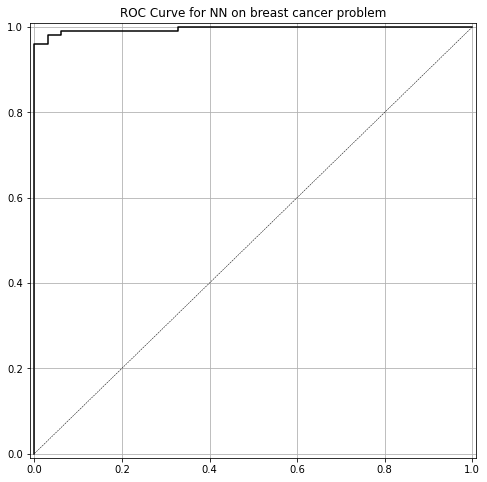

In [27]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on breast cancer problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Text(0.5, 1.0, 'Accuracy over iterations')

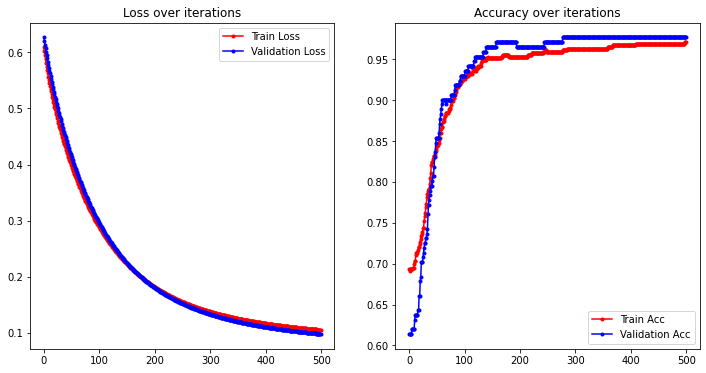

In [28]:
n = len(run_hist_1.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_1.history["loss"]),'r', marker='.', label="Train Loss")
ax.plot(range(n), (run_hist_1.history["val_loss"]),'b', marker='.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_1.history["accuracy"]),'r', marker='.', label="Train Acc")
ax.plot(range(n), (run_hist_1.history["val_accuracy"]),'b',marker='.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

Above, the ROC curve and graphs showing the loss and accuracy over iterations were plotted. These last two allow us to observe the evolution of model training over iterations.
The Receiver Operating Characteristic curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. In the next Figure you can see an illustration of how to analyze this curve.



| ![roc.svg](Roc.png) | 
|:--:| 
|  The ROC space for a 'better' and 'worse' classifier. From: *https://en.wikipedia.org/wiki/Receiver_operating_characteristic* |


As we can see, the result achieved by the generated ROC curve is very close to the point defined as "perfect classifier".


The final results obtained by this model were:

- accuracy is 0.977
- roc-auc is 0.996

And the Confusion Matrix of the classification can be seen below:


In [88]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_class_nn_1))
print('Classification Report')

Confusion Matrix
[[ 65   2]
 [  2 102]]
Classification Report


In [87]:
target_names = ['Malignat', 'Benign']
print(classification_report(y_test, y_pred_class_nn_1, target_names=target_names))

              precision    recall  f1-score   support

    Malignat       0.97      0.97      0.97        67
      Benign       0.98      0.98      0.98       104

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Model 2


## Defining the Model

Again, I will use the Sequential model to quickly build a neural network. This network will be a two hidden layers network. We have 9 variables, so we set the input shape to 9. The model defined below has 2 hidden layers, each with 7 nodes with ReLU activation. As the problem ia a binary classification, the final layer has just one node with a sigmoid activation.

In [43]:
model_2 = Sequential()
model_2.add(Dense(7,input_shape = (9,),activation = 'relu'))
model_2.add(Dense(7,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 7)                 70        
_________________________________________________________________
dense_28 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 8         
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

This model will be trained with the Adam optimizer with learning rate equals to 0.003. 
Others training parameters are:
- epochs = 50
- batch_size = 32


In [102]:
opt = Adam(learning_rate=0.003)
model_2.compile(opt, "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50, verbose=0)

Text(0.5, 1.0, 'Accuracy over iterations')

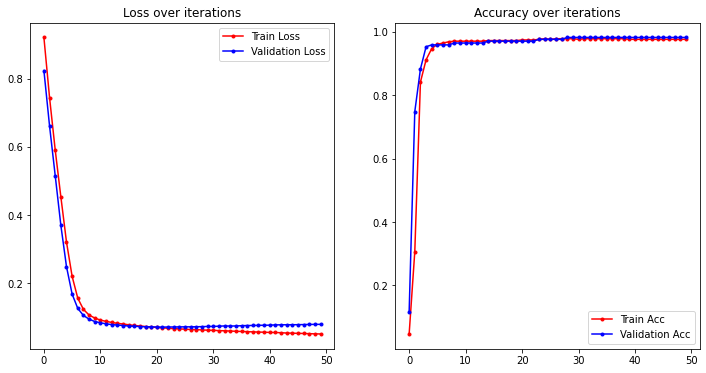

In [46]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r', marker='.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b', marker='.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r', marker='.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b',marker='.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.982
roc-auc is 0.992


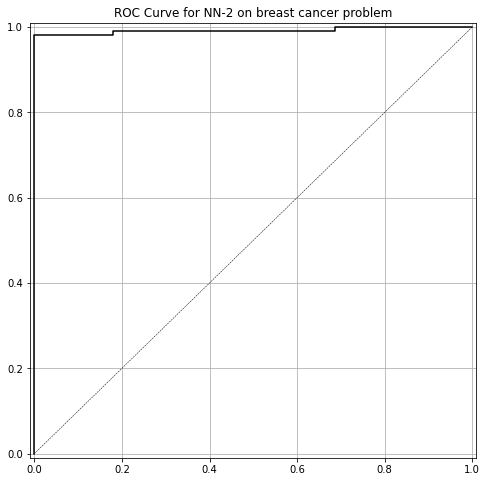

In [47]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
### END SOLUTION

As we can see, with this model we obtained even better results (accuracy equals to 0.982) than the last one.

In [90]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_class_nn_2))
print('Classification Report')

Confusion Matrix
[[ 67   0]
 [  3 101]]
Classification Report


In [92]:
target_names = ['Malignat', 'Benign']
print(classification_report(y_test, y_pred_class_nn_2, target_names=target_names))

              precision    recall  f1-score   support

    Malignat       0.96      1.00      0.98        67
      Benign       1.00      0.97      0.99       104

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



# Model 3

## Defining the model

In this last model, we will have a 3 hidden layers network. We have 9 variables, so we set the input shape to 9. 
The model defined below has 3 hidden layers:
- Layer 1: 11 nodes with ReLU activation function.
- Layers 2 and 3: 6 nodes with ReLU activation function.

As the problem ia a binary classification, the final layer has just one node with a sigmoid activation.

In [53]:
model_3 = Sequential()
model_3.add(Dense(11,input_shape = (9,),activation = 'relu'))
model_3.add(Dense(6,activation='relu'))
model_3.add(Dense(6,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 11)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 7         
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


## Training and Testing the Model

In [103]:
opt = Adam(learning_rate=0.003)
model_3.compile(opt, "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50, verbose=0)

Text(0.5, 1.0, 'Accuracy over iterations')

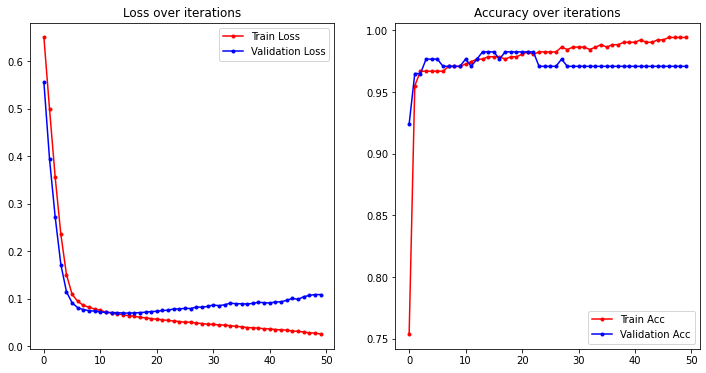

In [57]:
n = len(run_hist_3.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_3.history["loss"]),'r', marker='.', label="Train Loss")
ax.plot(range(n), (run_hist_3.history["val_loss"]),'b', marker='.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_3.history["accuracy"]),'r', marker='.', label="Train Acc")
ax.plot(range(n), (run_hist_3.history["val_accuracy"]),'b',marker='.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

While the training loss is still going down, it looks like the validation loss has gotten worse. This suggests that our network will not benefit from further training. Also was possible to see that this new network with more layers suffers more of overfitting. 


accuracy is 0.971
roc-auc is 0.991


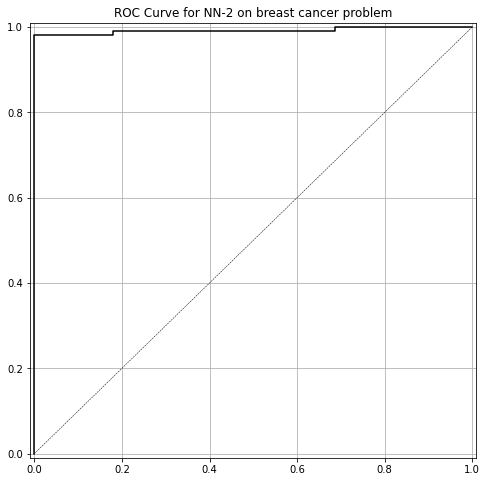

In [60]:
y_pred_class_nn_3 = model_3.predict_classes(X_test_norm)
y_pred_prob_nn_3 = model_3.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')


Like the other models, this one also achieved a satisfactory result, with an accuracy of approximately 0.97.

In [91]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_class_nn_3))
print('Classification Report')

Confusion Matrix
[[ 65   2]
 [  3 101]]
Classification Report


In [93]:
target_names = ['Malignat', 'Benign']
print(classification_report(y_test, y_pred_class_nn_3, target_names=target_names))

              precision    recall  f1-score   support

    Malignat       0.96      0.97      0.96        67
      Benign       0.98      0.97      0.98       104

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Get a baseline performance using Random Forest

Just to get a baseline for the performance of our last classifiers we will train a Random Forest model with 200 trees on the training data and calculate the accuracy and roc_auc_score of the predictions..

In [77]:
### BEGIN SOLUTION
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [78]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.977
roc-auc is 0.990


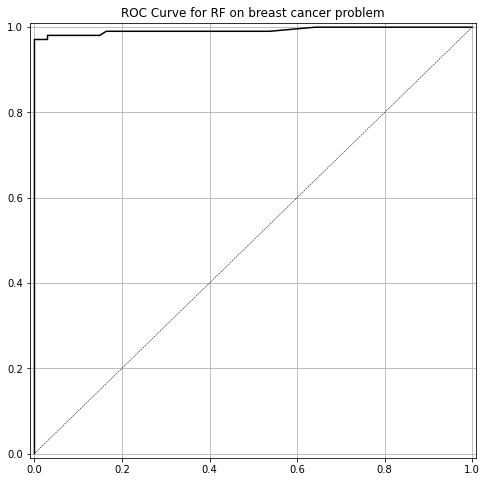

In [76]:
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

We obtained a result very similar to those achieved using the models based on Neural Networks.

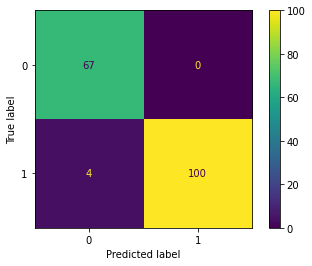

In [96]:
plot_confusion_matrix(rf_model, X_test, y_test) 

# References

1. William H. Wolberg and O.L. Mangasarian: "Multisurface method of     pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87,   December 1990, pp 9193-9196.